<a href="https://colab.research.google.com/github/secun/Promo2_Business_Analytics/blob/main/4_Script_Modulo_4_SOLUCIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Módulo 4 - Análisis de datos Parte 2**

# Ejercicio 1
 Extrae a todos los trabajadores de los mercados "NACIONAL" y "LOCAL O REGIONAL"

 Extrae a todos los trabajadores de los mercados "UNIÓN EUROPEA" y "MUNDIAL"
 
 ¿En Cuál de estos dos colectivos hay mayor dispersión de salarios?


In [ ]:
load(url("https://github.com/AndresMtnezGlez/MABA/raw/main/4_datos.RData"))
summary(datos)

    salario           vacaciones   salario_por_hora     impuestos      
 Min.   :   357.4   22     :2014   Min.   :  0.8817   Min.   :    0.0  
 1st Qu.: 17469.6   23     : 519   1st Qu.:  9.1583   1st Qu.:  151.6  
 Median : 25322.8   25     : 462   Median : 13.0517   Median :  302.1  
 Mean   : 30226.7   30     : 397   Mean   : 15.7154   Mean   :  449.0  
 3rd Qu.: 37349.0   24     : 328   3rd Qu.: 18.9554   3rd Qu.:  548.3  
 Max.   :882929.1   (Other):1011   Max.   :434.1766   Max.   :13895.2  
 NA's   :1          NA's   :   1   NA's   :1          NA's   :1        
          sexo                  mercado           categoria      distancia    
 HOMBRE     :2769   LOCAL O REGIONAL:1607   DIRECTIVO  :  43   Min.   : 1.00  
 MUJER      :1959   MUNDIAL         : 829   MANDO_MEDIO:1823   1st Qu.:20.00  
 No contesta:   3   NACIONAL        :2005   TECNICO    :2865   Median :40.00  
 NA's       :   1   UNIÓN EUROPEA   : 290   NA's       :   1   Mean   :40.49  
                    NA's     

In [ ]:
NACIONAL <- subset(datos,datos$mercado=="NACIONAL")
summary(NACIONAL)

In [ ]:
LOCAL <- subset(datos,datos$mercado=="LOCAL O REGIONAL")
summary(LOCAL)

In [ ]:
UE <- subset(datos,datos$mercado=="UNIÓN EUROPEA")
summary(UE)


In [ ]:
MUNDIAL <- subset(datos,datos$mercado=="MUNDIAL")
summary(MUNDIAL)

In [ ]:
Local_Nacional=rbind(LOCAL,NACIONAL)
summary(Local_Nacional)

In [ ]:
Europa_Mundial=rbind(UE,MUNDIAL)
summary(Europa_Mundial)

In [ ]:
sd(Local_Nacional$salario)
sd(Europa_Mundial$salario)

# Ejercicio 2
 1) Dibuja el histograma para la variable impuestos. Prueba distinto número de intervalos hasta encontrar el número ideal
 2) ¿Se te ocurre algún modo de mejorar la visualización

 1) Dibuja el histograma para la variable impuestos. Prueba distinto número de intervalos hasta encontrar el número ideal


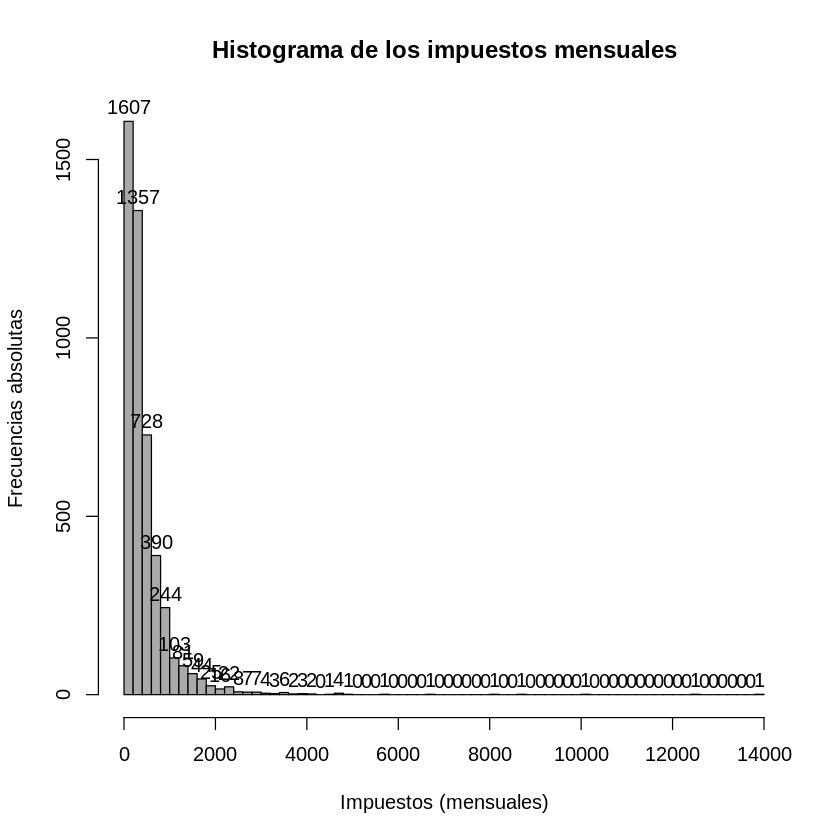

In [ ]:
hist(datos$impuestos, #Datos
     breaks=50, # número de intervalos
     col="darkgray",
     main="Histograma de los impuestos mensuales",
     xlab = "Impuestos (mensuales)", 
     ylab ="Frecuencias absolutas",
     labels=T) #añadimos etiquetas con los valores (frecuencias) de cada intervalo


2) ¿Se te ocurre algún modo de mejorar la visualización

Podemos eliminar a los empelados con impuestos mas alto (hacer zoom en la parte baja)

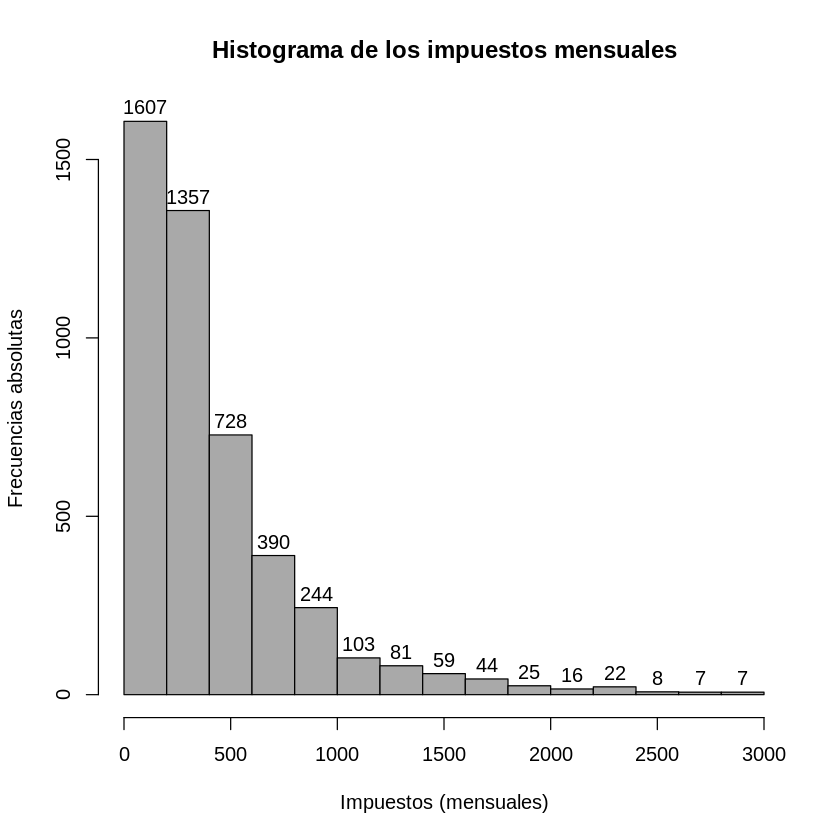

In [ ]:
Impuestos_menos_3000=subset(datos,datos$impuestos<3000)
hist(Impuestos_menos_3000$impuestos, #Datos
     breaks=20, # número de intervalos
     col="darkgray",
     main="Histograma de los impuestos mensuales",
     xlab = "Impuestos (mensuales)", 
     ylab ="Frecuencias absolutas",
     labels=T) #añadimos etiquetas con los valores (frecuencias) de cada intervalo


# Ejercicio 3
 
 Considerando a los trabajadores que cobran menos de 70.000 euros y trabajan en mercado nacional
 
 Dibuja la función de densidad de Hombres Vs Mujeres para la variable impuestos

 Incluye las medias en el gráfico

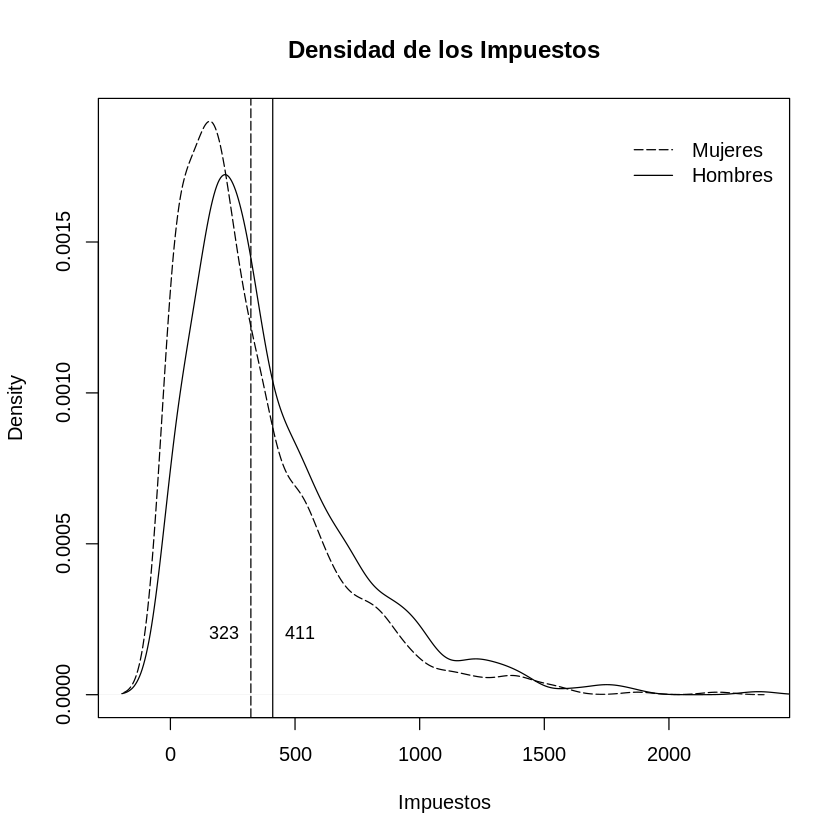

In [ ]:
datos_SalarioInferior70000=subset(datos,datos$salario<70000)

datos_SalarioInferior70000_nacional <- subset(datos_SalarioInferior70000,datos_SalarioInferior70000$mercado=="NACIONAL")

Mujeres <- subset(datos_SalarioInferior70000_nacional, 
                datos_SalarioInferior70000_nacional$sexo=="MUJER")
Hombres <- subset(datos_SalarioInferior70000_nacional, 
                datos_SalarioInferior70000_nacional$sexo=="HOMBRE")
plot(density(Mujeres$impuestos, bw = "nrd0", adjust = 1,
             kernel = c("gaussian")), lty=5, main="Densidad de los Impuestos",
     xlab="Impuestos")

abline(v = mean(Mujeres$impuestos),lty=5)
text(mean(Mujeres$impuestos),0.0002,round(mean(Mujeres$impuestos),0),pos=2,cex = 0.9)

lines(density(Hombres$impuestos, bw = "nrd0", adjust = 1,
              kernel = c("gaussian")),lty=1)
abline(v = mean(Hombres$impuestos),lty=1)
text(mean(Hombres$impuestos),0.0002,round(mean(Hombres$impuestos),0),pos=4,cex = 0.9)

legend("topright", legend = c("Mujeres","Hombres"),
       title = "", # Título
       title.adj = 0.5,          # Ajuste horizontal del título
       bty = "n", # Elimina la línea de la caja
       lty = c(5, 1), col = c(1, 1))

# Ejercicio 4
 1) Dibuja los boxplot y violin plot para el salario según el tipo de mercado

   ¿Cuál de los dos consideras que es más útil? ¿Por qué?
 2) ¿Podemos mejorar la representacion

In [ ]:
library(ggplot2)


 1) Dibuja los boxplot y violin plot para el salario según el tipo de mercado

   ¿Cuál de los dos consideras que es más útil? ¿Por qué?

Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Groups with fewer than two data points have been dropped.”


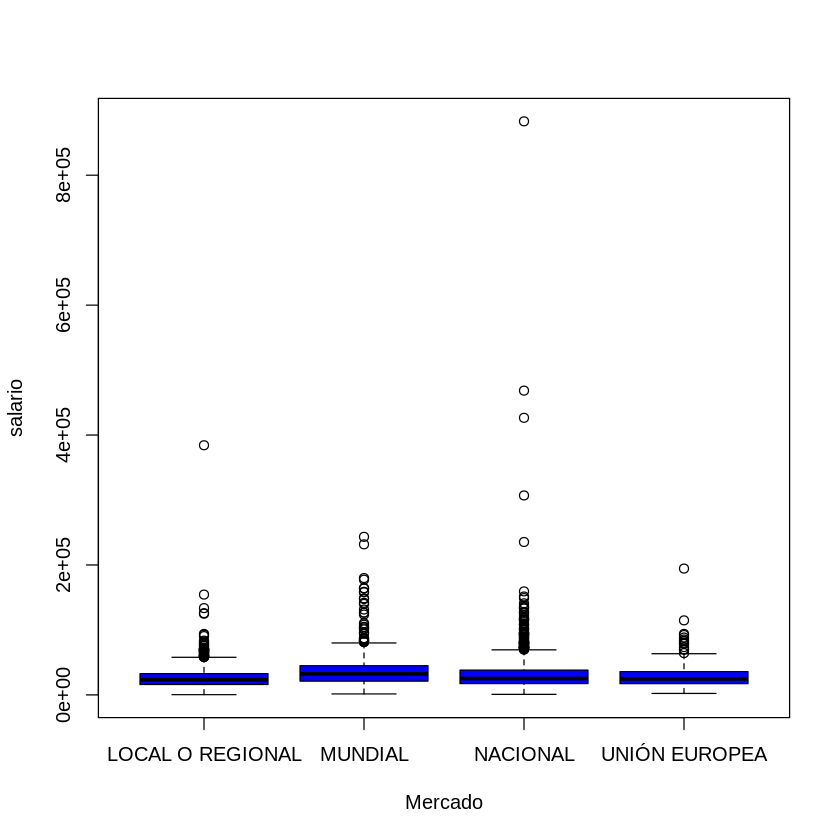

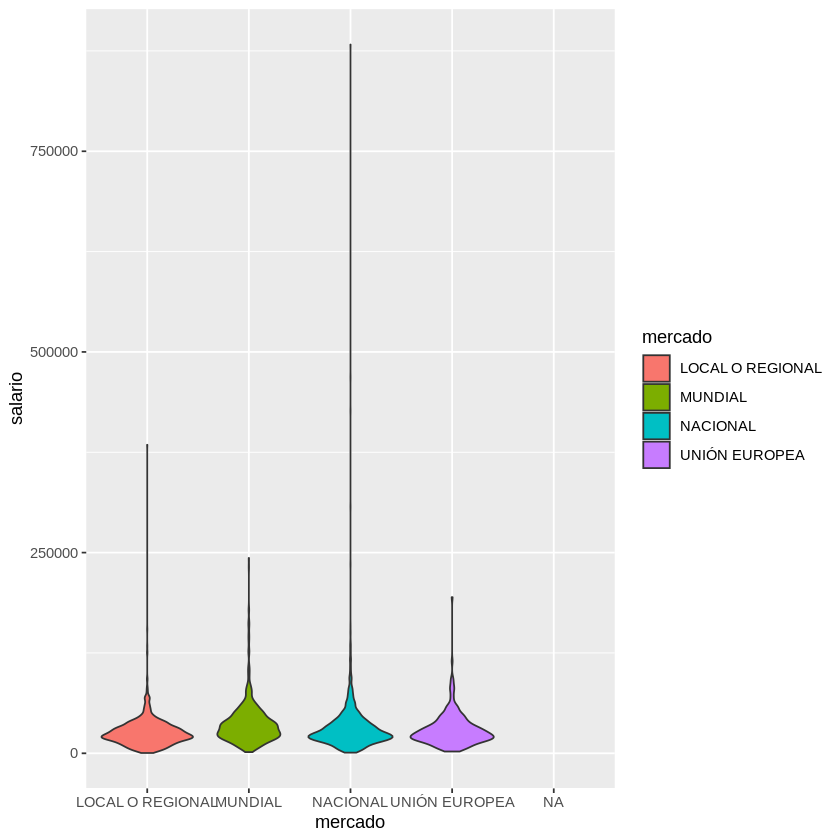

In [ ]:
boxplot(salario~mercado, 
        data=datos, 
        col ="blue", 
        xlab="Mercado")

ggplot(datos,aes(x=mercado,y=salario, fill=mercado)) +
  geom_violin()


 2) ¿Podemos mejorar la representacion
 Sí. Podemos eliminar los salarios más altos, que distorsionan la representación

Warning message:
“Groups with fewer than two data points have been dropped.”


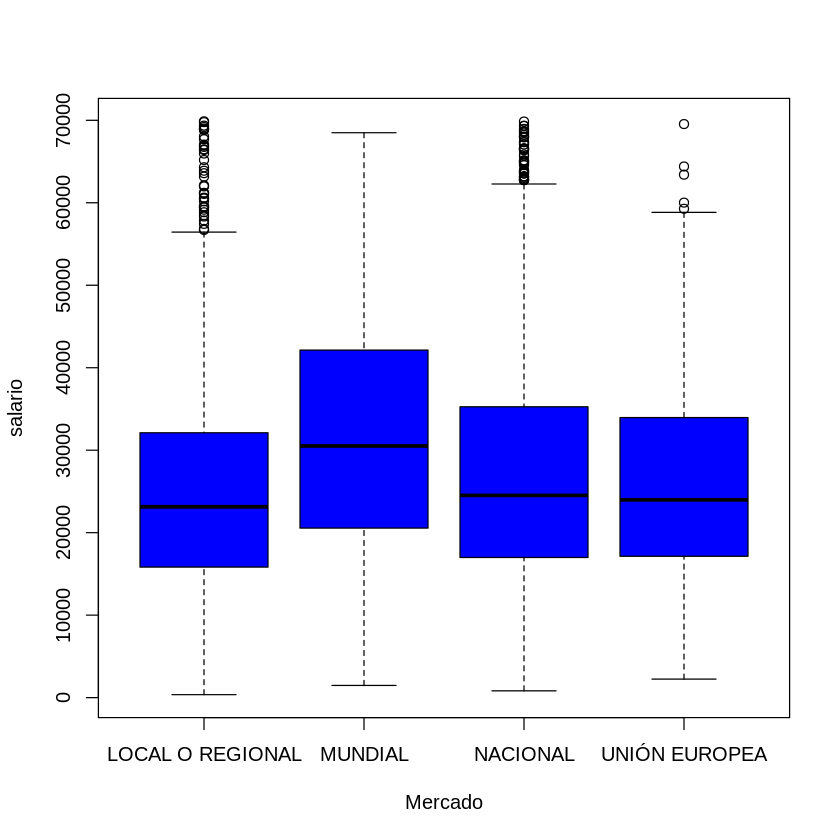

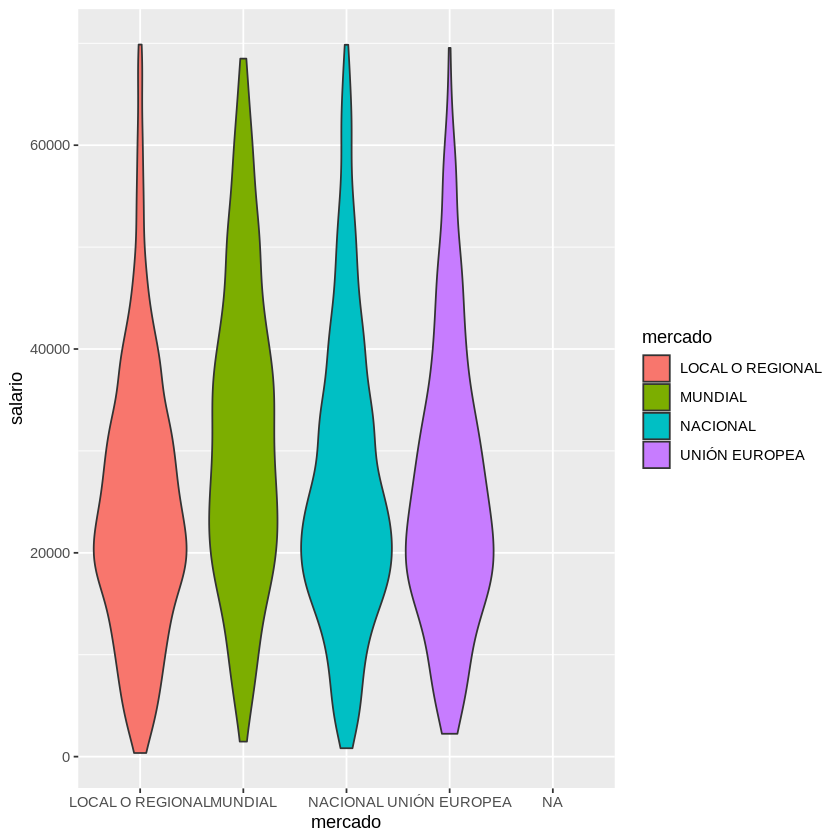

In [ ]:
datos_SalarioInferior70000=subset(datos,datos$salario<70000)
boxplot(salario~mercado, 
        data=datos_SalarioInferior70000, 
        col ="blue", 
        xlab="Mercado")

ggplot(datos_SalarioInferior70000,aes(x=mercado,y=salario, fill=mercado)) +
  geom_violin()

# Ejercicio 5
 Calcula el coeficiente de variación para la variable impuestos y distinguiendo por "Mercado"


In [ ]:

IMPUESTOS_MEDIA <- tapply(datos$impuestos, 
             datos$mercado, 
             mean, 
             na.rm=TRUE)
IMPUESTOS_MEDIA

IMPUESTOS_SD <- tapply(datos$impuestos, 
                    datos$mercado, 
                    sd, 
                    na.rm=TRUE)
IMPUESTOS_SD

IMPUESTOS_SD/IMPUESTOS_MEDIA



# Ejercicio 6
 Considera el colectivo que cobra menos de 80.000 euros

 Calcula la correlación entre salario y vacaciones

 Dibuja el diagrama de dispersión entre salario y vacaciones distinguiendo por "Mercado"
 
 ¿Qué podemos concluir?




	Pearson's product-moment correlation

data:  datos_SalarioInferior80000$salario and datos_SalarioInferior80000$vacaciones
t = 11.783, df = 4609, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1428471 0.1988902
sample estimates:
     cor 
0.171007 


Warning message:
“Removed 1 rows containing missing values (geom_point).”


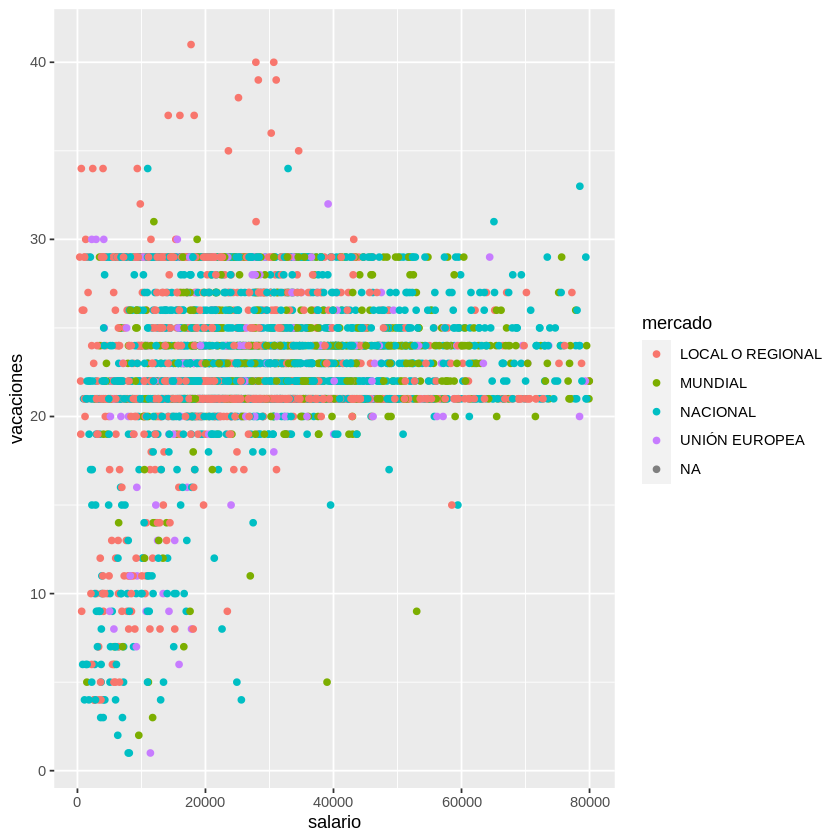

In [ ]:
datos_SalarioInferior80000=subset(datos,datos$salario<80000)

datos_SalarioInferior80000$vacaciones=as.numeric(datos_SalarioInferior80000$vacaciones)

cor.test(datos_SalarioInferior80000$salario,datos_SalarioInferior80000$vacaciones)

ggplot(data = datos_SalarioInferior80000,
       mapping = aes(x=salario, y = vacaciones, color=mercado)) + 
  geom_point() 

# PRACTICA FINAL PARTE 1

 En base al data frame "datos", se sospecha que las retenciones fiscales tienen errores
 Evalue esta afirmación
 En caso de que haya problemas, identifique un individuo para solicitar información detallada a la empresa



	Pearson's product-moment correlation

data:  datos$salario and datos$impuestos
t = 134.72, df = 4729, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8846356 0.8964232
sample estimates:
     cor 
0.890679 


    salario           vacaciones   salario_por_hora     impuestos      
 Min.   :   357.4   22     :2014   Min.   :  0.8817   Min.   :    0.0  
 1st Qu.: 17469.6   23     : 519   1st Qu.:  9.1583   1st Qu.:  151.6  
 Median : 25322.8   25     : 462   Median : 13.0517   Median :  302.1  
 Mean   : 30226.7   30     : 397   Mean   : 15.7154   Mean   :  449.0  
 3rd Qu.: 37349.0   24     : 328   3rd Qu.: 18.9554   3rd Qu.:  548.3  
 Max.   :882929.1   (Other):1011   Max.   :434.1766   Max.   :13895.2  
 NA's   :1          NA's   :   1   NA's   :1          NA's   :1        
          sexo                  mercado           categoria      distancia    
 HOMBRE     :2769   LOCAL O REGIONAL:1607   DIRECTIVO  :  43   Min.   : 1.00  
 MUJER      :1959   MUNDIAL         : 829   MANDO_MEDIO:1823   1st Qu.:20.00  
 No contesta:   3   NACIONAL        :2005   TECNICO    :2865   Median :40.00  
 NA's       :   1   UNIÓN EUROPEA   : 290   NA's       :   1   Mean   :40.49  
                    NA's     

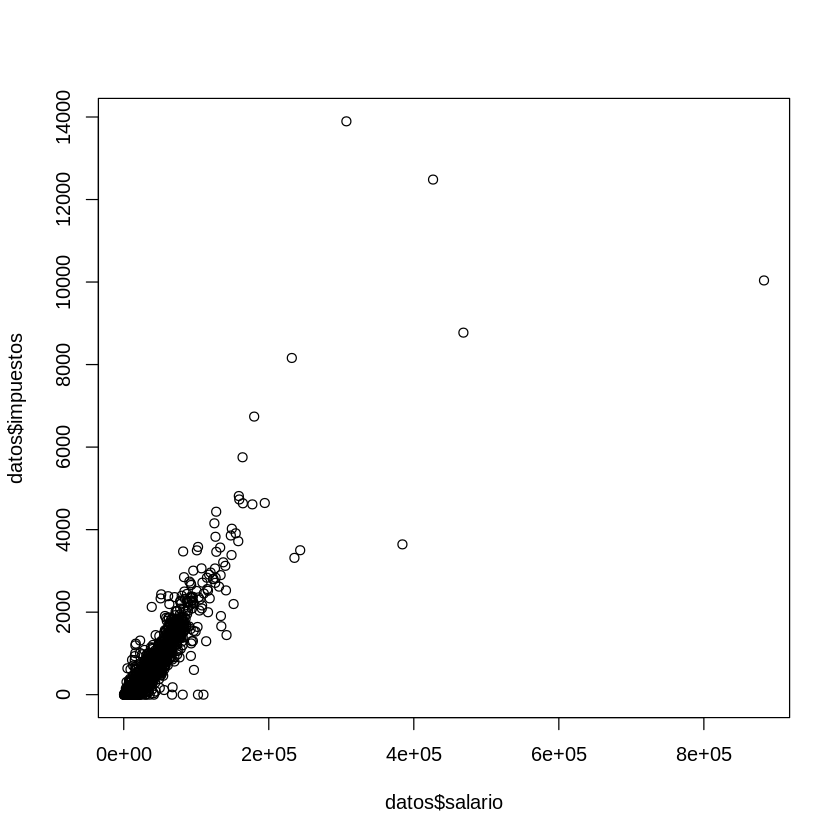

salario,vacaciones,salario_por_hora,impuestos,sexo,mercado,categoria,distancia,PORCENTAJE_RETENCION
<dbl>,<ord>,<dbl>,<dbl>,<fct>,<fct>,<ord>,<dbl>,<dbl>
29020.20,21,NA,737.53,HOMBRE,NA,TECNICO,52,0.30497240
51962.23,NA,24.913398,658.03,NA,MUNDIAL,MANDO_MEDIO,NA,0.15196345
NA,30,24.902908,NA,HOMBRE,MUNDIAL,NA,25,NA
27030.19,22,13.291980,307.92,HOMBRE,NACIONAL,TECNICO,25,0.13670048
26557.39,22,13.059482,275.74,HOMBRE,NACIONAL,TECNICO,6,0.12459357
75461.07,25,36.179965,1454.78,HOMBRE,MUNDIAL,MANDO_MEDIO,24,0.23134260
51452.11,25,24.668820,951.43,HOMBRE,MUNDIAL,MANDO_MEDIO,11,0.22189877
19640.21,22,9.416539,250.08,HOMBRE,LOCAL O REGIONAL,TECNICO,72,0.15279674
19324.20,21,9.265027,204.82,HOMBRE,NACIONAL,TECNICO,2,0.12718974


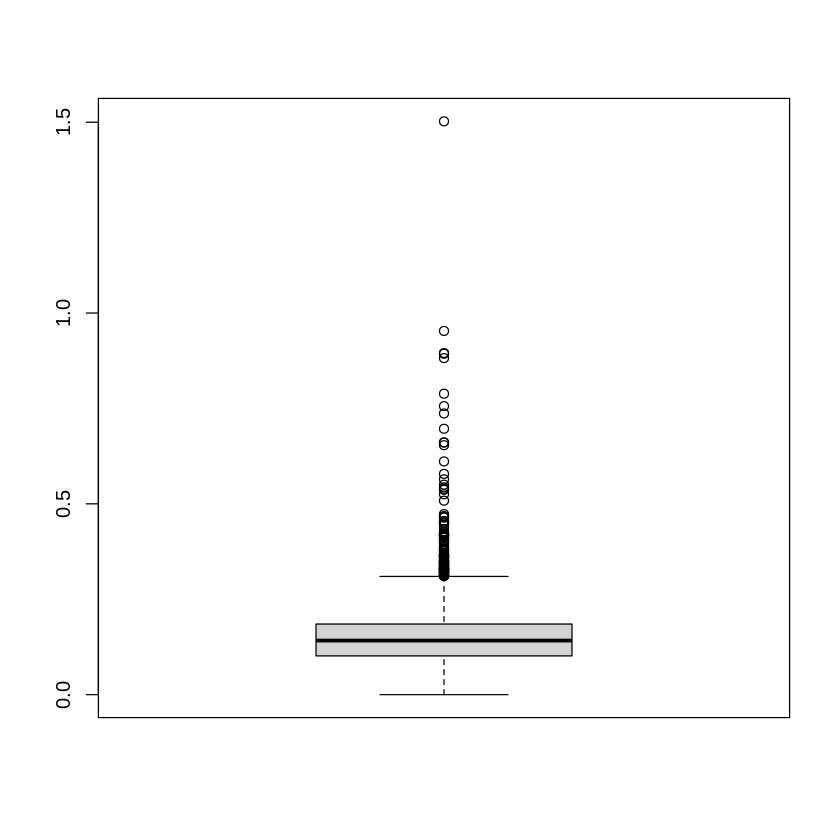

In [ ]:
cor.test(datos$salario,datos$impuestos)
plot(datos$salario,datos$impuestos)

datos$PORCENTAJE_RETENCION=(datos$impuestos)/(datos$salario/12)
summary(datos)
boxplot(datos$PORCENTAJE_RETENCION)
View(datos) #ordenamos por porcentaje de retención -> Individuo 2723


# PRACTICA FINAL PARTE 2
 Carga los datos "Simpson.xls"
Corresponden a la Universidad de Simpson
 Se muestran los alumnos franceses y españoles admitidos en dicha universidad
 La universidad ha sido demandada por discriminación: admiten menos franceses que españoles
 Emita un dictamen sobre la veracidad de esa demanda


In [ ]:
#Esta parte extrae los datos desde Github. 
github_link <- "https://github.com/AndresMtnezGlez/MABA/raw/main/4_Simpson.xlsx"
library(httr)
temp_file <- tempfile(fileext = ".xlsx")
req <- GET(github_link, 
          # authenticate using GITHUB_PAT
           authenticate(Sys.getenv("GITHUB_PAT"), ""),
          # write result to disk
           write_disk(path = temp_file))
Simpson <- readxl::read_excel(temp_file)
summary(Simpson)


   Decision          Titulacion          Espanoles      Franceses 
 Length:4           Length:4           Min.   : 5.0   Min.   :10  
 Class :character   Class :character   1st Qu.:12.5   1st Qu.:10  
 Mode  :character   Mode  :character   Median :22.5   Median :10  
                                       Mean   :20.0   Mean   :15  
                                       3rd Qu.:30.0   3rd Qu.:15  
                                       Max.   :30.0   Max.   :30  

In [ ]:
Aceptados=subset(Simpson, Simpson$Decision=="Aceptados")
Aceptados

Rechazados=subset(Simpson, Simpson$Decision=="Rechazados")
Rechazados

Espanoles=sum(Simpson$Espanoles)
Franceses=sum(Simpson$Franceses)

#Porcentaje de Espanoles admitidos: 44%
sum(Aceptados$Espanoles)/Espanoles

#Porcentaje de Franceses admitidos: 33%
sum(Aceptados$Franceses)/Franceses

#Aparentemente hay discriminación. Vamos a verlo por titulación

Ingenieria=subset(Simpson, Simpson$Titulacion=="Ingenieria")
Ingenieria

# Porcentaje de Españoles admitidos en Ingenieria: 50%
Ingenieria[1,3]/sum(Ingenieria$Espanoles)

# Porcentaje de Franceses admitidos en Ingenieria: 50%
Ingenieria[1,4]/sum(Ingenieria$Franceses)

Derecho=subset(Simpson, Simpson$Titulacion=="Derecho")
Derecho

# Porcentaje de Españoles admitidos en Derecho: 25%
Derecho[1,3]/sum(Derecho$Espanoles)

# Porcentaje de Franceses admitidos en Derecho: 25%
Derecho[1,4]/sum(Derecho$Franceses)

Decision,Titulacion,Espanoles,Franceses
<chr>,<chr>,<dbl>,<dbl>
Aceptados,Ingenieria,30,10
Aceptados,Derecho,5,10


Decision,Titulacion,Espanoles,Franceses
<chr>,<chr>,<dbl>,<dbl>
Rechazados,Ingenieria,30,10
Rechazados,Derecho,15,30


[1] 0.4375

[1] 0.3333333

Decision,Titulacion,Espanoles,Franceses
<chr>,<chr>,<dbl>,<dbl>
Aceptados,Ingenieria,30,10
Rechazados,Ingenieria,30,10


Espanoles
<dbl>
0.5


Franceses
<dbl>
0.5


Decision,Titulacion,Espanoles,Franceses
<chr>,<chr>,<dbl>,<dbl>
Aceptados,Derecho,5,10
Rechazados,Derecho,15,30


Espanoles
<dbl>
0.25


Franceses
<dbl>
0.25



 Claramente no hay discriminación
 Simplemente los franceses aplican a Derecho más que los españoles
 Y como derecho tiene mayor tasa de rechazo, el porcentaje de rechazados es mayor
 Pero el % de admisión en las 2 titulaciones es idéntico
Esto es lo que se conoce como la paradoja de Simpson